In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !unzip gdrive/My\ Drive/radiusai/dataset.zip > /dev/null

In [ ]:
# Import Libraries
import matplotlib.pylab as plt
import tensorflow_hub as hub
from tensorflow.keras import layers
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Read image paths

imagePaths=[]
for root, dirnames, filenames in os.walk(r'../dataset'):
    for filename in filenames:
        if (filename[-3:] == 'jpg'):
            imagePaths.append(os.path.join(root, filename))
            
print(len(imagePaths))

25260


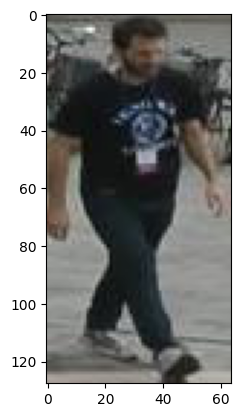

In [ ]:
# Visualise image

k=[]
for i in imagePaths:
    try:
        image=plt.imread(i)
        k.append(image)
    except:
        pass

plt.imshow(k[256])

(-0.5, 63.5, 127.5, -0.5)

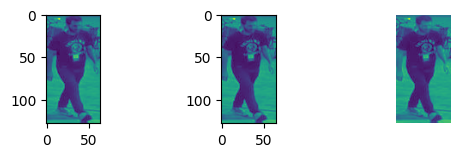

In [ ]:
b,g,r = cv2.split(k[256])
# plt.show(b[0])

ax1 = plt.subplot(3, 3, 1)
plt.imshow(r)
ax2 = plt.subplot(3, 3, 2)
plt.imshow(g)
ax3 = plt.subplot(3, 3, 3)
plt.imshow(b)
plt.axis("off")

In [ ]:
# Import pre-trained model

IMAGE_RES = 224

URL = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)

In [ ]:
model = tf.keras.Sequential([
  feature_extractor,
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
Total params: 23,564,800
Trainable params: 0
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# Process image

image=plt.imread(imagePaths[0])
image = cv2.resize(image, (224, 224))
image = image/255
model(np.array([image]))

<tf.Tensor: shape=(1, 2048), dtype=float32, numpy=
array([[0.29773638, 0.4952295 , 0.03077652, ..., 0.        , 0.09335981,
        0.06095642]], dtype=float32)>

In [ ]:
# Write features to file

fp = open("resnet_features.txt", "w")
image_features = []
for i in range(len(imagePaths)):
    try:
        image=plt.imread(imagePaths[i])
        image = cv2.resize(image, (224, 224))
        image = image/255
        fp.write(imagePaths[i]+","+",".join(map(str, model(np.array([image])).numpy()[0].tolist()))+"\n")
    except:
        pass
fp.close()

In [ ]:
!wc -l /resnet_features*

25259 /content/drive/MyDrive/radiusai/resnet_features.txt


In [ ]:
# Read features from files

image_features=[]
image_path = []
fp = open('resnet_features.txt')
for line in fp:
  line = line.strip()
  image_path.append(line.split(",")[0].split("/")[1].split(",")[0])
  image_features.append(list(map(float, line.split(",")[1:])))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[16517741.697884597, 15773029.31311882, 15064393.035967827, 14674642.223032048, 14413261.912856273, 14233313.784266088, 14077731.326476753, 13951920.505607422, 13852684.97483408, 13747287.279459227, 13669686.7090184, 13451523.378036741, 13288423.454174936, 13099554.320349097, 12922833.267409243, 12761618.29913871, 12639395.269901898, 12519882.876373313, 12425263.510982413]


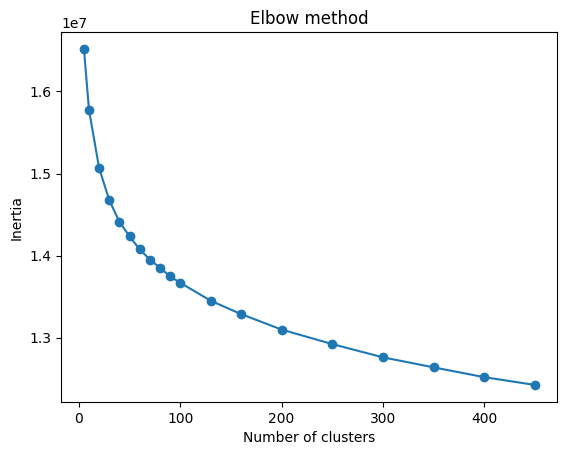

In [ ]:
# Cluster images

from sklearn.cluster import KMeans

inertias = []
cluster_list = [5,10,20,30,40,50,60,70,80,90,100,130,160,200,250,300,350,400,450]
for i in cluster_list:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(image_features)
    inertias.append(kmeans.inertia_)

print(inertias)

plt.plot(cluster_list, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()